In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water.csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['water.csv']))

**1**

In [16]:
df = df.drop(['Unnamed: 0'], axis=1)

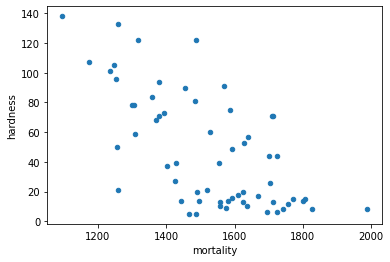

In [17]:
df.plot(kind='scatter', x='mortality', y='hardness')

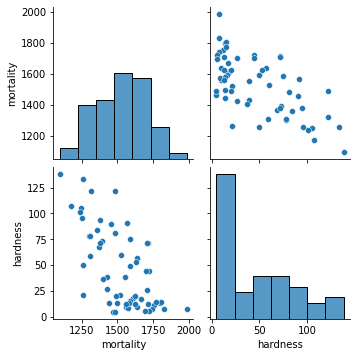

In [18]:
sns.pairplot(df)

In [19]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [20]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [21]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


**2**

In [25]:
X = df[['mortality']]
y = df['hardness']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [104]:
X_train.shape

(42, 1)

In [105]:
y_train.shape

(42,)

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
model.coef_

array([-0.12670202])

In [108]:
model.intercept_

239.3678426140957

In [109]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

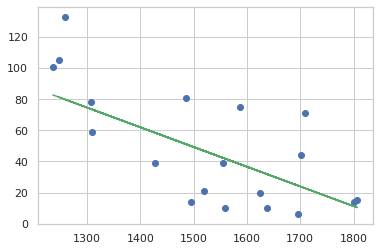

In [162]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='g')

коэффициент детерминации

In [110]:
model.score(X_test, y_test) 

0.4948982822876836

график остатков

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


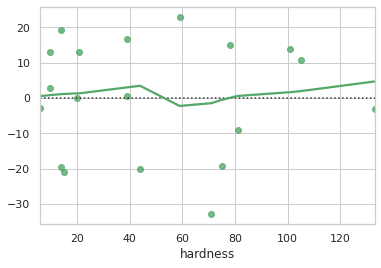

In [134]:
sns.residplot(y_test, y_pred, lowess=True, color="g")

**3**

In [135]:
df_North = df[df['location'] == 'North']
df_South = df[df['location'] == 'South']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


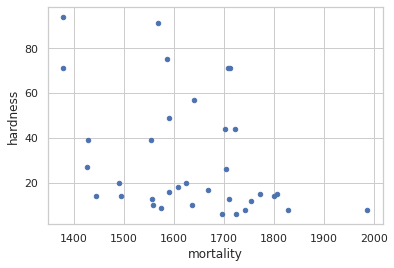

In [136]:
df_North.plot(kind='scatter', x='mortality', y='hardness')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


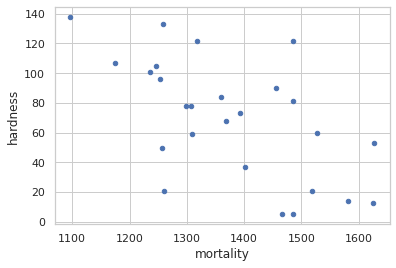

In [137]:
df_South.plot(kind='scatter', x='mortality', y='hardness')

In [138]:
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [139]:
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [140]:
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [141]:
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [144]:
X_North = df_North[['mortality']]
y_North = df_North['hardness']

In [145]:
X_South = df[['mortality']]
y_South = df['hardness']

In [147]:
X_North_train, X_North_test, y_North_train, y_North_test = train_test_split(X_North, y_North, test_size=0.30, random_state=42)

In [148]:
X_South_train, X_South_test, y_South_train, y_South_test = train_test_split(X_South, y_South, test_size=0.30, random_state=42)

In [149]:
model_North = LinearRegression()
model_North.fit(X_North_train, y_North_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
model_South = LinearRegression()
model_South.fit(X_South_train, y_South_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
y_North_pred = model.predict(X_North_test)
y_North_pred

array([-12.38906137,  39.93887087,  56.41013283,  20.9335686 ,
        37.78493661,  22.32729077,  23.72101293,  18.65293233,
        42.34620915,  14.85187188,  58.43736507])

In [152]:
y_South_pred = model.predict(X_South_test)
y_South_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

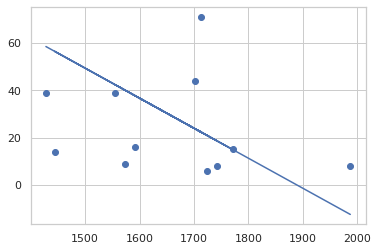

In [161]:
plt.scatter(X_North_test, y_North_test)
plt.plot(X_North_test, y_North_pred, c='b')

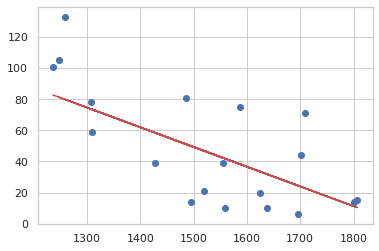

In [154]:
plt.scatter(X_South_test, y_South_test)
plt.plot(X_South_test, y_South_pred, c='r')

In [155]:
model.score(X_North_test, y_North_test) 

-0.6393247923774821

In [156]:
model.score(X_South_test, y_South_test) 

0.4948982822876836

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


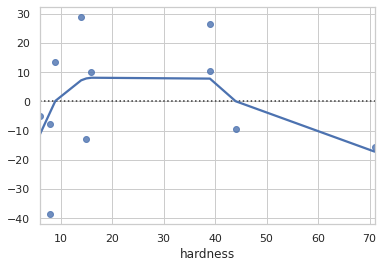

In [159]:
sns.residplot(y_North_test, y_North_pred, lowess=True, color="b")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


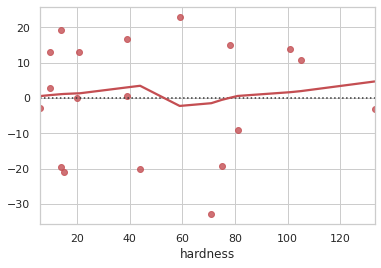

In [160]:
sns.residplot(y_South_test, y_South_pred, lowess=True, color="r")